# EDA pada data tweet

---

###1- Proses load library atau package yang digunakan
Pada proses ini kami menggunakan package library pandas, numpy, seaborn, matplotlib, nltk, sklearn, unicodedata, dan sastrawi untuk memudahkan dalam proses penggalian data.

Library pandas : Digunakan untuk preprosesing data
Library numpy : Digunakan untuk operasi matematika pada list/array
Library seaborn : Digunakan untuk membuat grafis dan statistik 
Library Matplotlib : Digunakan untuk visualisasi data


In [ ]:
from google.colab import drive
drive.mount('/content/drive') #Perintah ini adalah untuk mengakses folder atau file dari google drive (mounting)

Mounted at /content/drive


In [ ]:
!pip install Sastrawi #Menginstall library Sastrawi

     |████████████████████████████████| 209 kB 4.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
#mengimport library numpy dan diinisialisasikan dengan nama np, untuk pandas bernama pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#mengimport library seaborn dan diinisialisasikan dengan nama sns, untuk matplotlib.pyplot bernama plt

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
"""Pertama adalah mengimport library nltk kemudian diimport sub library lainnya sesuai kebutuhan tokenisasi 
dan stopword"""

import re,string,unicodedata
from string import punctuation
from wordcloud import WordCloud,STOPWORDS
"""Mengimport library re, string dan unicodedata. Kemudian dari string dimport library punctuation untuk 
memberikantanda baca, kemudian library wordcloud untuk digunakan dalam menampilkan kata-kata awal(wordcloud)"""


from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

"""Library sastrawi akan digunakan untuk menghapus stopword dan proses stemming, sehingga perlu diimport library
StopwordRemoerFctory dan StemmerFactory"""


'Library sastrawi akan digunakan untuk menghapus stopword dan proses stemming, sehingga perlu diimport library\nStopwordRemoerFctory dan StemmerFactory'

###2- Proses Load Dataset
Di proses ini dataset yang digunakan akan di definisikan pada sebuah variabel agar lebih memudahkan dalam proses pengolahan data.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/colab/data.csv',encoding="ISO-8859-1")
df.head()

"""Perintah diatas digunakan untuk membaca file berformat csv dari link mounted Google Drive, dengan encoding
ISO-8858-1 kemudian ditampilkan dengan perintah df.head()"""

'Perintah diatas digunakan untuk membaca file berformat csv dari link mounted Google Drive, dengan encoding\nISO-8858-1 kemudian ditampilkan dengan perintah df.head()'

In [ ]:
df.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
kamus_alay = pd.read_csv('/content/drive/My Drive/colab/new_kamusalay.csv', encoding='latin-1', header=None)
kamus_alay = kamus_alay.rename(columns={0: 'alay', 
                                      1: 'baku'})

"""Perintah diatas merupakan inisiasi untuk membaca kamus alay kemudian perintah beriktutnya
 mengganti kolom dengan indeks terurut menjadi string (dictionary list)"""

kamus_stopword = pd.read_csv('/content/drive/My Drive/colab/stopwordbahasa.csv', header=None)
kamus_stopword = kamus_stopword.rename(columns={0: 'stopword'})


"""Perintah diatas merupakan inisiasi untuk membaca kamus stopword kemudian perintah beriktutnya
 mengganti kolom dengan indeks terurut menjadi string (dictionary list)"""

emoji = pd.read_csv('/content/drive/My Drive/colab/Emoticon.csv', encoding="ISO-8859-1", header=None)
emoji = emoji.rename(columns={0: 'hexa',
                              1: 'arti'})

"""Perintah diatas merupakan inisiasi untuk membaca kamus emoji kemudian perintah beriktutnya
 mengganti kolom dengan indeks terurut menjadi string (dictionary list)"""

kamus_noemoji =  pd.read_csv('/content/drive/My Drive/colab/bytemoaja.csv', encoding='latin-1', header=None)
kamus_noemoji = kamus_noemoji.rename(columns={0: 'byte', 
                                      1: 'hapus'})

"""Perintah diatas merupakan inisiasi untuk membaca kamus noemoji kemudian perintah beriktutnya
 mengganti kolom dengan indeks terurut menjadi string (dictionary list)"""

'Perintah diatas merupakan inisiasi untuk membaca kamus noemoji kemudian perintah beriktutnya\n mengganti kolom dengan indeks terurut menjadi string (dictionary list)'

###3- Proses Casefolding
Di proses casefolding ini merupakan tahap untuk konversi text menjadi suatu bentuk yang standar. Pada tahap ini biasanya dipilih lowercase untuk membuat huruf kapital menjadi lowercase 

In [ ]:
def casefolding(text):
    return text.lower()
df['Tweet'] = df['Tweet'].apply(casefolding)

"""Perintah diatas mendefinisikan fungsi untuk mengubah kata menjadi berkarakter huruf kecil semua
proses ini dinamakan casefolding. Parameter text yang digunakan akan diubah (return) menjadi lower"""

'Perintah diatas mendefinisikan fungsi untuk mengubah kata menjadi berkarakter huruf kecil semua\nproses ini dinamakan casefolding. Parameter text yang digunakan akan diubah (return) menjadi lower'

###4- Proses melihat banyak label keputusan
Pada tahap ini, kami perlu mengetahui berapa banyak label keputusan dalam menentukan apakah kalimat tersebut mengandung ujaran kebencian (positif = 1) atau tidak (negatif = 0).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


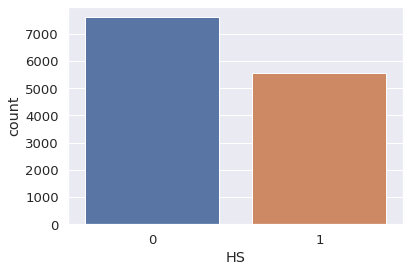

In [ ]:
sns.set(style = 'darkgrid', font_scale = 1.2)
sns.countplot(df.HS)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


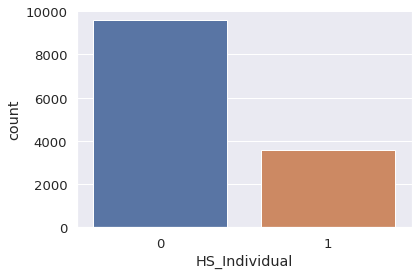

In [ ]:
sns.set(style = 'darkgrid', font_scale = 1.2)
sns.countplot(df.HS_Individual)

###5- Mengecek Missing Values ()
Adanya missing value, akan mengganggu proses pengolahan data selanjutnya. Maka dari itu perlu dilakukan pengecekan apakah terdapat data yang kosong pada salah satu field dataset.

In [ ]:
df.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

###6- Proses Cleansing
Di proses cleansing ini merupakan proses pembersihan terhadap data yang redudan atau ganda, inkonsisten, missing value dan outlier data. Hal tersebut perlu dilakukan agar tidak mempengaruhi performa proses klasifikasi yang dilakukan.

In [ ]:
df['Tweet']
"""Perintah diatas untuk menampilkan sebagian isi tweet"""

'Perintah diatas untuk menampilkan sebagian isi tweet'

In [ ]:
print("Ukuran: ", kamus_alay.shape)
kamus_alay.head(15)
#"""Perintah diatas untuk menampilkan ukuran dan sebagian data kamus alay"""

Ukuran:  (15167, 2)


,alay,baku
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


In [ ]:
print("Ukuran: ", kamus_noemoji.shape)
kamus_noemoji.head(15)
"Perintah diatas untuk menampilkan ukuran dan sebagian data kamus alay"""

Ukuran:  (15167, 2)


'Perintah diatas untuk menampilkan ukuran dan sebagian data kamus alay'

In [ ]:
print("Ukuran: ", kamus_stopword.shape)
kamus_stopword.head(15)

Ukuran:  (758, 1)


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak
5,agaknya
6,agar
7,akan
8,akankah
9,akhir


In [ ]:
print("Ukuran: ", emoji.shape)
emoji.head(15)

Ukuran:  (969, 2)


,hexa,arti
0,\xF0\x9F\x80\x84,mahjong merah
1,\xF0\x9F\x83\x8F,kartu joker hitam
2,\xF0\x9F\x85\xB0,golongan darah a
3,\xF0\x9F\x85\xB1,golongan darah b
4,\xF0\x9F\x85\xBE,golongan darah o
5,\xF0\x9F\x86\x91,tombol CL
6,\xF0\x9F\x86\x92,tombol COOL
7,\xF0\x9F\x86\x93,tombol FREE
8,\xF0\x9F\x86\x94,tombol ID
9,\xF0\x9F\x86\x95,tombol NEW


In [ ]:
#def casefolding(text):
#    return text.lower()

def hapus_karakter_useless(text):
    text = re.sub('\n',' ',text) # Hapus '\n'
    text = re.sub('rt',' ',text) # Hapus simbol retweet
    text = re.sub('locator',' ',text) # Menghapus kata locator
    text = re.sub('resource',' ',text) # Hapus kata resource
    text = re.sub('user',' ',text) # Hapus sibol user
    text = re.sub('url',' ',text) # Hapus kata uniform
    text = re.sub('gue',' ',text) # Hapus kata uniform
    text = re.sub('iya',' ',text) # Hapus kata uniform
    text = re.sub('amp',' ',text) # Hapus kata uniform
    text = re.sub('ya',' ',text) # Hapus kata uniform
    text = re.sub('sih',' ',text) # Hapus kata uniform
    text = re.sub('pas',' ',text) # Hapus kata uniform
    text = re.sub('ng',' ',text) # Hapus kata uniform
    text = re.sub('sa',' ',text) # Hapus kata uniform
    text = re.sub('rak',' ',text) # Hapus kata uniform
    text = re.sub('uniform',' ',text) # Hapus kata uniform
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Hapus URL
    text = re.sub('  +', ' ', text) # Hapus spasi lebih
    return text
    
def hapus_nonalpanumerik(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

map_emoji = dict(zip(emoji['hexa'], emoji['arti']))

def convert_emot(text):
    return ' '.join([map_emoji[word] if word in map_emoji else word for word in text.split(' ')])
##### COBA

"""map_noemoji = dict(zip(kamus_noemoji['hexa'], emoji['arti']))

def convert_emot(text):
    return ' '.join([map_emoji[word] if word in map_emoji else word for word in text.split(' ')])
"""
##### COBA

# def cleansing_emothex(text):
#     text = text.decode('iso-8859-9').encode('utf-8')
#     return text

def cleaning(text):
    text = hapus_nonalpanumerik(text) # 2
    text = hapus_karakter_useless(text) # 2
    return text

print("lowercase: ", casefolding("Halooo, duniaa!"))
print(b'\xF0\x9F\x80\x84'.hex())
print("remove_nonaplhanumeric: ", hapus_nonalpanumerik("Halooo,,,,, duniaa!!"))
print("remove_unnecessary_char: ", hapus_karakter_useless("Hehe\n\n rt USER USER uniform apa kabs www.google.com\n  hehe"))

"""

"""

# df['Tweet'] = df['Tweet'].apply(cleaning)


lowercase:  halooo, duniaa!
f09f8084
remove_nonaplhanumeric:  Halooo duniaa 
remove_unnecessary_char:  Hehe USER USER apa kabs hehe


'\n\n'

###7- Proses Normalization
Pada proses normalization ini kalimat pada kolom tweet dataset akan di normalisasi. Dalam kondisi kata yang tidak baku diubah menjadi baku.

In [ ]:
map_kamus_alay = dict(zip(kamus_alay['alay'], kamus_alay['baku']))

def normalisasi(text):
    return ' '.join([map_kamus_alay[word] if word in map_kamus_alay else word for word in text.split(' ')])

print("normalize_alay: ", normalisasi("aamiin adek abis 3x"))

# df['Tweet'] = df['Tweet'].apply(normalisasi)

normalize_alay:  amin adik habis tiga kali


In [ ]:
map_katauseless = dict(zip(kamus_noemoji['byte'], kamus_noemoji['hapus']))


def normalisasinoemoji(text):
    return ' '.join([map_katauseless[word] if word in map_katauseless else word for word in text.split(' ')])

print("normalize_alay: ", normalisasinoemoji("x80 x8A anda sudah pergi jauh 3x"))


normalize_alay:  yang x8A anda sudah pergi jauh 3x


###8- Proses Stopword Removal
Pada proses stopword removal ini kata-kata pada dataset stopword akan dihapus. Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll.

In [ ]:
def hapus_stopword(text):
    text = ' '.join(['' if word in kamus_stopword.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Hapus spasi lebih
    text = text.strip()
    return text
print("remove_stopword: ", hapus_stopword("ada hehe adalah huhu yang hehe"))

# df['Tweet'] = df['Tweet'].apply(hapus_stopword)

remove_stopword:  hehe huhu hehe


###9- Proses Stemming
Tahap ini akan menghilangkan suffix dan prefix pada token/kata (reduce inflected), sehingga sebuah kata yang memiliki suffix maupun prefix akan kembali kebentuk dasarnya

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)
print("stemming: ", stemming("Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan"))

# df['Tweet'] = df['Tweet'].apply(stemming)

stemming:  ekonomi indonesia sedang dalam tumbuh yang bangga


In [ ]:
 def clean_text(text):
   text = hapus_kurung(text)
   text = hapus_url(text)
   text = remove_special_characters(text, remove_digits=True)
   # text = stemmer(text)
   text = remove_stopwords(text)
   if (text=="br"):
     text=""
   return text

def preprocess(text):
    text = casefolding(text) # 1
    text = hapus_nonalpanumerik(text) # 2
    text = hapus_karakter_useless(text) # 2
    text = normalisasi(text) # 3
    text = stemming(text) # 4
    text = normalisasinoemoji(text)#6 no EMOJI
    text = hapus_stopword(text) # 5
    return text

df['Tweet'] = df['Tweet'].apply(preprocess)

In [ ]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,at cowok beru lacak perhati lantas remeh perha...,1,1,1,0,0,0,0,0,1,1,0,0
1,telat a tau edan rap gaul deh an cigax jifla c...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kada pikir perca tuhan jatuh kali kali kada...,0,0,0,0,0,0,0,0,0,0,0,0
3,ku tau mata sipit lihat,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebo kafir lihat do okn do oke haha,1,1,0,1,1,0,0,0,0,0,1,0


###Mengubah label menjadi angka

###Membuat Wordcloud
Pada proses ini, teks akan di representasi menjadi bentuk visual, biasanya digunakan untuk menggambarkan metadata keywords (tags) pada sebuah website/situs, untuk memvisualisasikan suatu bentuk teks secara bebas.

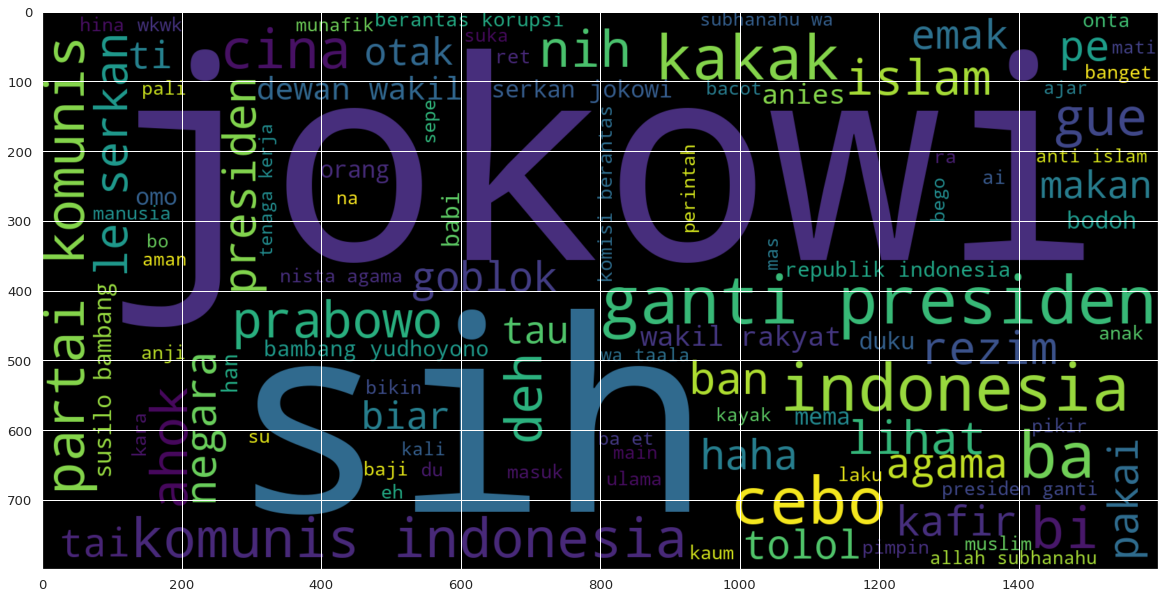

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(df[df.HS == 1].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

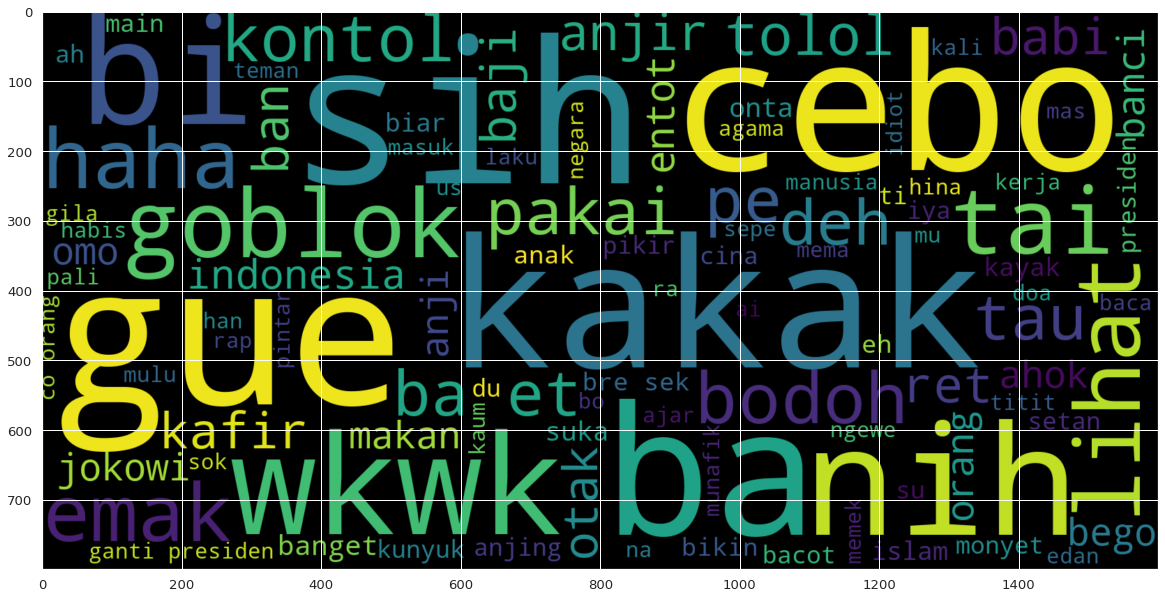

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(df[df.Abusive == 1].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

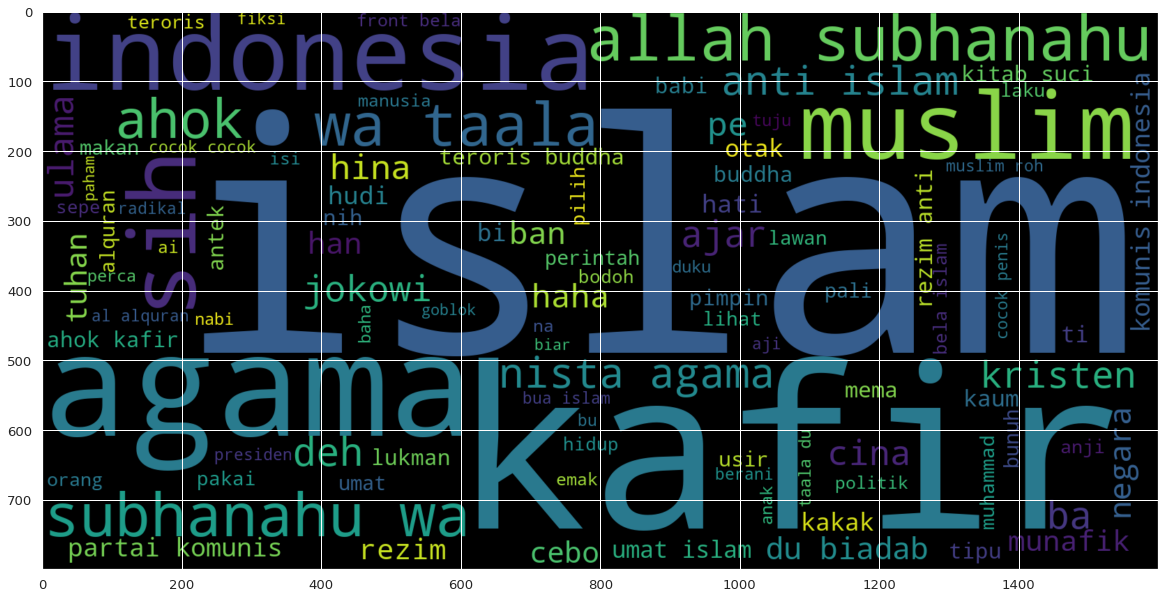

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(df[df.HS_Religion == 1].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

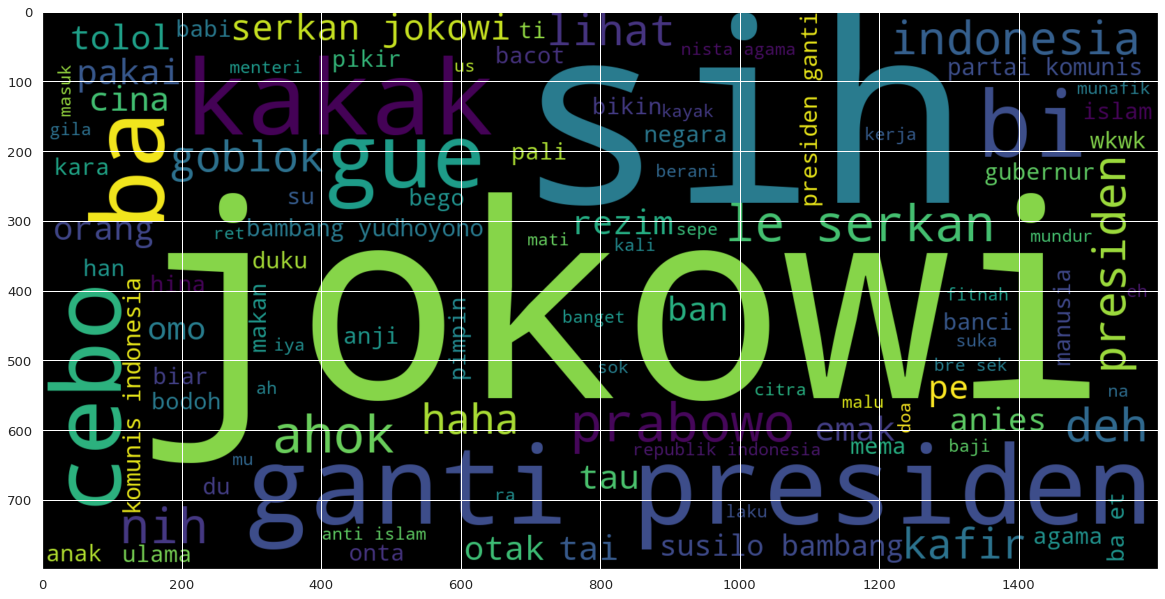

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(df[df.HS_Individual == 1].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

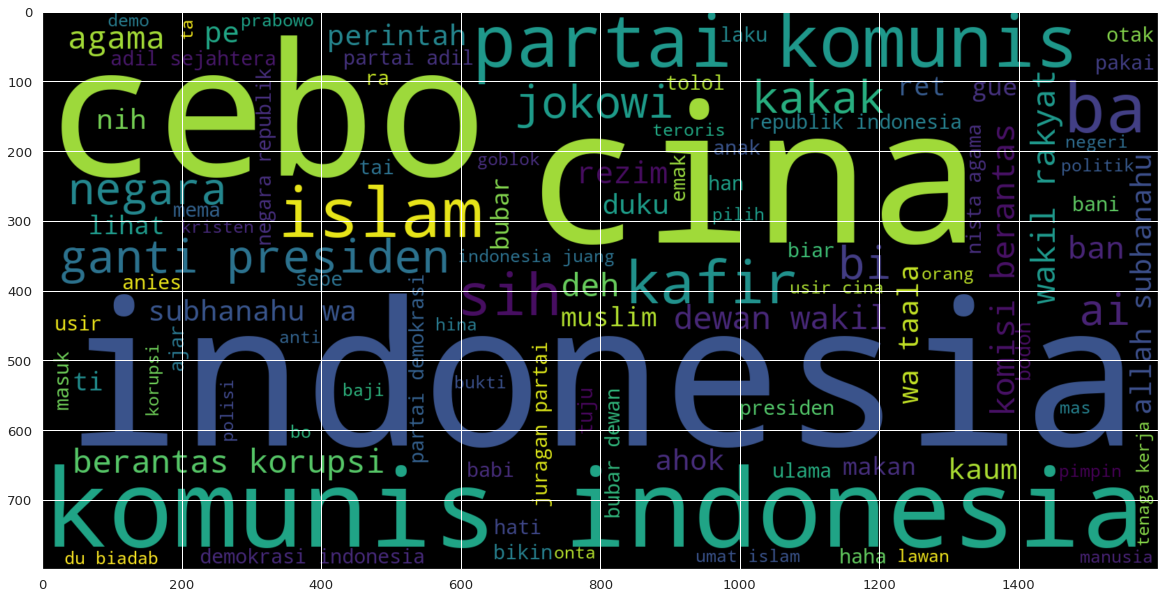

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(df[df.HS_Group == 1].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

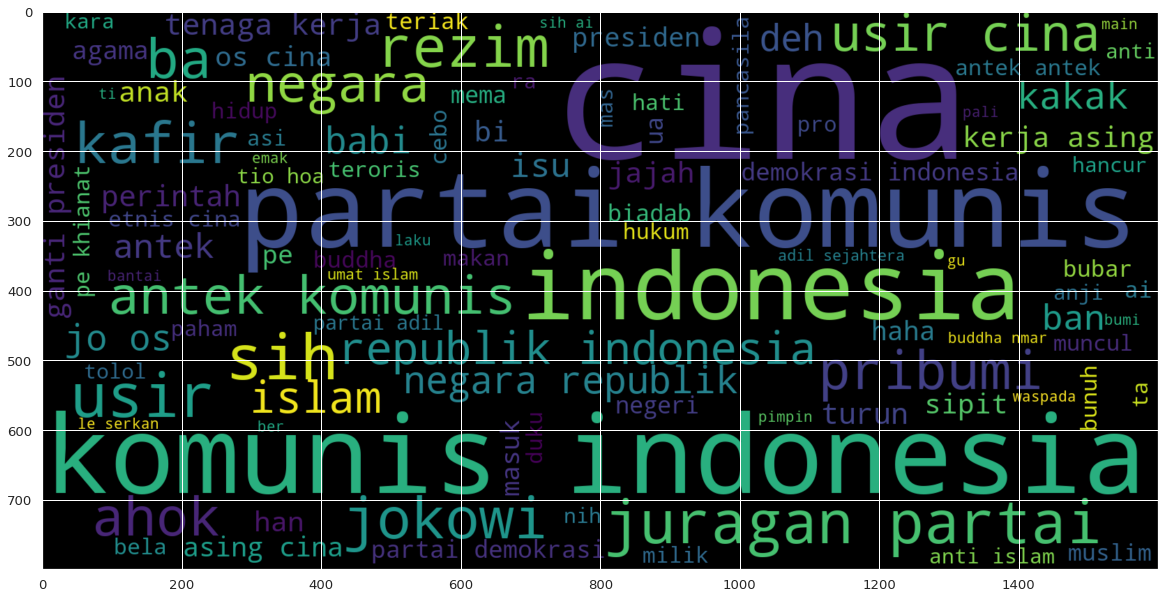

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(df[df.HS_Race == 1].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
text = df['Tweet'].values.tolist()
label = df['HS'].values